In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt

4.1.21

Решение системы методом Гаусса

In [4]:
A = np.array([[7.92, 3.36, -2.24, 1.98], [-13.86, 18.20, 0, 3.96], [-2.97, 0.20, 4.80, 0], [5.94, 0, -10.60, 16.83]])
b = np.array([14.556, -100.54, -1.27, -71.31])
x=np.linalg.solve(A,b)
print(x)

[ 4.17031201 -1.4316858   2.3754508  -4.21282679]


Преобразование системы

In [6]:
n = A.shape
D = np.zeros(n)
Di = np.zeros(n)
for i in range(A.shape[0]):
    D[i][i] = A[i][i]
    Di[i][i] = 1/A[i][i]
B = np.dot(Di, D - A)
c = np.dot(Di, b)

Проверка условия

In [9]:
np.linalg.norm(B, ord = np.inf)

0.9827688651218064

Метод Зейделя

In [10]:
def Seidel(B, c, x0, mi=10, e=1e-3):
    x1 = x0
    for i in range(mi):
        x2 = x1
        x1 = np.dot(B, x2) + c
        if np.linalg.norm(x2 - x1, ord=np.inf) < e:
            return x1, i + 1
        
    return x1, i + 1

Решение методом Зейделя и погрешность

In [14]:
x0 = np.array([0, 0, 0, 0])
xs = Seidel(B, c, x0, 10)[0]
print(xs)
print(np.linalg.norm(x - xs, ord=np.inf))

[ 4.16223811 -1.43598977  2.37013377 -4.19572888]
0.017097907176058413


Решение методом Зейделя с другим начальным приближением

In [15]:
x0 = np.array([-1, 1, -1, 1])
xs = Seidel(B, c, x0, 10)[0]
print(xs)
print(np.linalg.norm(x - xs, ord=np.inf))

[ 4.16061939 -1.43663097  2.3683828  -4.18935659]
0.023470195627712798


Начальное приближение взято чуть дальше от ответа, поэтому погрешность увеличилась

4.2

In [18]:
x0 = np.array([-1, 1, -1, 1])
xs = Seidel(B, c, x0, 100, 1e-6)
print(xs[0])
print(xs[1])
print(np.linalg.norm(x - xs[0], ord=np.inf))

[ 4.17031225 -1.43168548  2.37545091 -4.21282674]
28
3.1629078445227776e-07


4.4.1

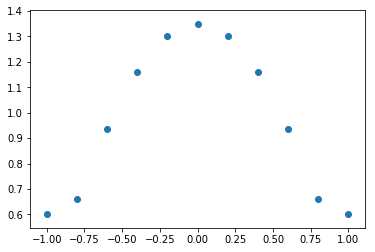

In [29]:
B = np.array([[0.2, 0.3, -0.1], [0.1, -0.25, 0], [0, 0.1, 0.3]])
c = np.array([1, 2, 1])
t = np.arange(-1, 1.2, 0.2)
Norms = []
for i in t:
    B[1][2] = np.cos(0.5*i*math.pi)
    B[2][0] = np.sin(10*i*math.pi)
    Norms.append(np.linalg.norm(B, ord = np.inf))
plt.scatter(t, Norms)

4.7.6

Задание начальных параметров

In [63]:
n = 30
m = 6
q = 0.993 + (-1)**m*m*(1e-4)
t = m + n
tau = 0

for i in range(1, n + 1):
    tau += q**(2*i)
    
a = lambda i,j: tau + (q**i + q**j)*t if i != j else tau + 2*q**i*t + t**2

A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i,j] = a(i + 1, j + 1)
        
b = np.array([t*q**i for i in range(1,n+1)])
x = np.linalg.solve(A,b)

Приведение к удобному для итераций виду

In [59]:
B = np.zeros((n,n))
c = np.zeros(n)

for i in range(n):
    c[i] = b[i] / A[i, i]
    for j in range(n):
        if i != j:
            B[i][j] = -A[i, i] / A[i, i]

Метод релаксации

In [60]:
def rel(B, c, x0, w, mi, e):
    x=x0
    
    for i in range(mi):
        z = x
        x = np.dot(B, z) + c
        x = x*w + z*(1 - w)
        
        if (np.linalg.norm(x - z,np.inf) < e):
            return x, i+1   
    return x, i+1

Оптимальный параметр релаксации w

In [66]:
ws = np.linspace(0.1, 2, 100)

ls=[]

for w in ws:
    x1, nm = rel(B, c, x + 1, w, 100, 1e-6)
    ls.append(nm)

index = ls.index(min(ls))
w_opt = ws[index]
print(w_opt)
print(rel(B, c, x + 1, w_opt, 200, 1e-6)[0])

0.1
[1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60 1.61877771e+60 1.61877771e+60
 1.61877771e+60 1.61877771e+60]
